In [55]:
#!pip install transformers
#!pip install langdetect

#!pip install EmailParser

import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import re

from langdetect import detect
from langdetect import DetectorFactory




## 

# Exploratory Data Analysis

## 

In [56]:
train = pd.read_csv("./data/train.csv", sep=";")
test = pd.read_csv("./data/test_reduced.csv", sep=";")

In [57]:
train.head()

,Unnamed: 0,Id,Impact,Urgency,IncidentType,ServiceProcessed,MailSubject,MailTextBody,ManualGroups
0,3554,INC000010587669,4-Minor/Localized,2-High,Failure,EDA_S_BA_2FA,smart card blockiert MD5:2225e4a30a5b7e592ba34...,lieber helpdesk sie haben mir den computer fr...,NaN
1,3553,INC000010585556,4-Minor/Localized,4-Low,Service Request,EDA_S_Order Management,FW: Webcam MD5:f757a42a9bdb1dfd9c8427e588586ca8,liebe kolleginnen und kollegen ich möchte für...,NaN
2,3552,INC000010585519,4-Minor/Localized,4-Low,Failure,EDA_S_Peripheriegeräte,FW: IT Support heute Nachmittag MD5:bc594d6bfd...,liebe kolleginnen und kollegen es handelt sic...,NaN
3,3549,INC000010582950,4-Minor/Localized,4-Low,Service Request,EDA_S_Benutzerunterstützung,Botschaft Warschau - Administratoren-Zugang f...,"sehr geehrte damen und herren, die botschaft ...",Benutzeranleitungen_Telefonie
4,3548,INC000010582919,4-Minor/Localized,4-Low,Service Request,EDA_S_Order Management,FW: Commande d'un écran MD5:c2b8cb3281fed4e2d4...,liebe kolleginnen und kollegen ich möchte für...,NaN


In [58]:
train = train[["Id", "Urgency", "IncidentType", "MailSubject", "MailTextBody", "ServiceProcessed"]]

([<matplotlib.patches.Wedge at 0x7f36ec0547b8>,
 [Text(1.066520535499614, 0.26932127163968556, 'EDA_S_Order Management'),
  Text(0.8173238426353019, 0.7361940887156486, 'EDA_S_BA_Mailbox'),
  Text(0.39713265149255617, 1.0258097567865556, 'EDA_S_APS_OS_BasisSW'),
  Text(-0.09039127401692015, 1.0962798080698186, 'EDA_S_Mobile Kommunikation'),
  Text(-0.5227829211061916, 0.9678316059106965, 'EDA_ANW_SysP eDoc'),
  Text(-0.8270070888761993, 0.7252994381278083, 'EDA_S_APS_PC'),
  Text(-1.0160930778061086, 0.42137258718918785, 'EDA_S_BA_UCC_Benutzertelefonie'),
  Text(-1.0939529038061007, 0.11518265604769055, 'EDA_S_Netzdrucker'),
  Text(-1.090516542126681, -0.1441307439378116, 'EDA_S_BA_2FA'),
  Text(-1.0328749122331649, -0.37837734562118325, 'EDA_S_APS_Monitor'),
  Text(-0.9320653410943549, -0.5841696670751264, 'EDA_ANW_Intranet/Collaboration EDA'),
  Text(-0.8041898687507997, -0.7505189238111001, 'EDA_S_Zusätzliche Software'),
  Text(-0.656838374520649, -0.8823623687335448, 'EDA_S_BA_Acco

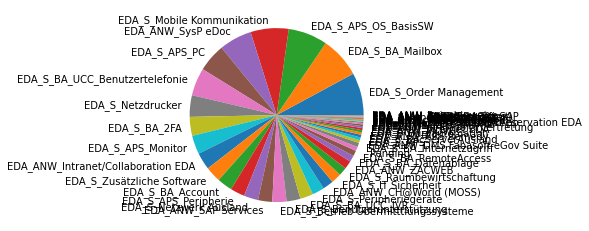

In [59]:
plt.pie(train["ServiceProcessed"].value_counts(), labels=train["ServiceProcessed"].value_counts().keys() )

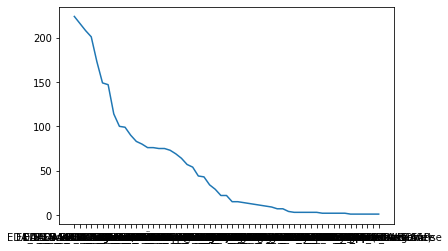

In [60]:
plt.plot(train["ServiceProcessed"].value_counts())

In [61]:
print(train["ServiceProcessed"].value_counts())
print(len(train["ServiceProcessed"].value_counts()))

EDA_S_Order Management                  224
EDA_S_BA_Mailbox                        216
EDA_S_APS_OS_BasisSW                    208
EDA_S_Mobile Kommunikation              201
EDA_ANW_SysP eDoc                       173
EDA_S_APS_PC                            149
EDA_S_BA_UCC_Benutzertelefonie          147
EDA_S_Netzdrucker                       114
EDA_S_BA_2FA                            100
EDA_S_APS_Monitor                        99
EDA_ANW_Intranet/Collaboration EDA       90
EDA_S_Zusätzliche Software               83
EDA_S_BA_Account                         80
EDA_S_APS_Peripherie                     76
EDA_S_Netzwerk Ausland                   76
EDA_ANW_SAP Services                     75
EDA_S_Betrieb Übermitttlungssysteme      75
EDA_S_Benutzerunterstützung              73
EDA_S_BA_UCC_IVR                         69
EDA_S_Peripheriegeräte                   64
EDA_ANW_CH@World (MOSS)                  57
EDA_S_IT Sicherheit                      54
EDA_S_Raumbewirtschaftung       

In [62]:
# Plot label distribution of the data.
def plot_label_distribution(df, label_name, threshold=False):
  """Input: Dataframe, threshold for filtering label frequency.Output: Plotting of label distribution of dataset.""" 
  label_count_dic = df[label_name].value_counts().to_dict()
  label_list = [] # going to be x-axis
  label_freq_list = [] # going to be y-axis
  
  for label, freq in zip(label_count_dic.keys(), label_count_dic.values()):
    # If threshold applies, filter values above threshold.
    if threshold != False: 
      if freq < threshold:
        label_list.append((label))
        label_freq_list.append((freq))
    else:
        label_list.append(label)
        label_freq_list.append((freq))
  # Plotting the distribution.
  plt.figure(figsize=(20,10))
  plt.xticks(rotation="vertical", fontsize=10)
  plt.title("Distribution of All Labels") if threshold == False else plt.title("Label Distribution with Thresholded Labels Frequencies")
  plt.bar(label_list, label_freq_list)
  return plt.show()

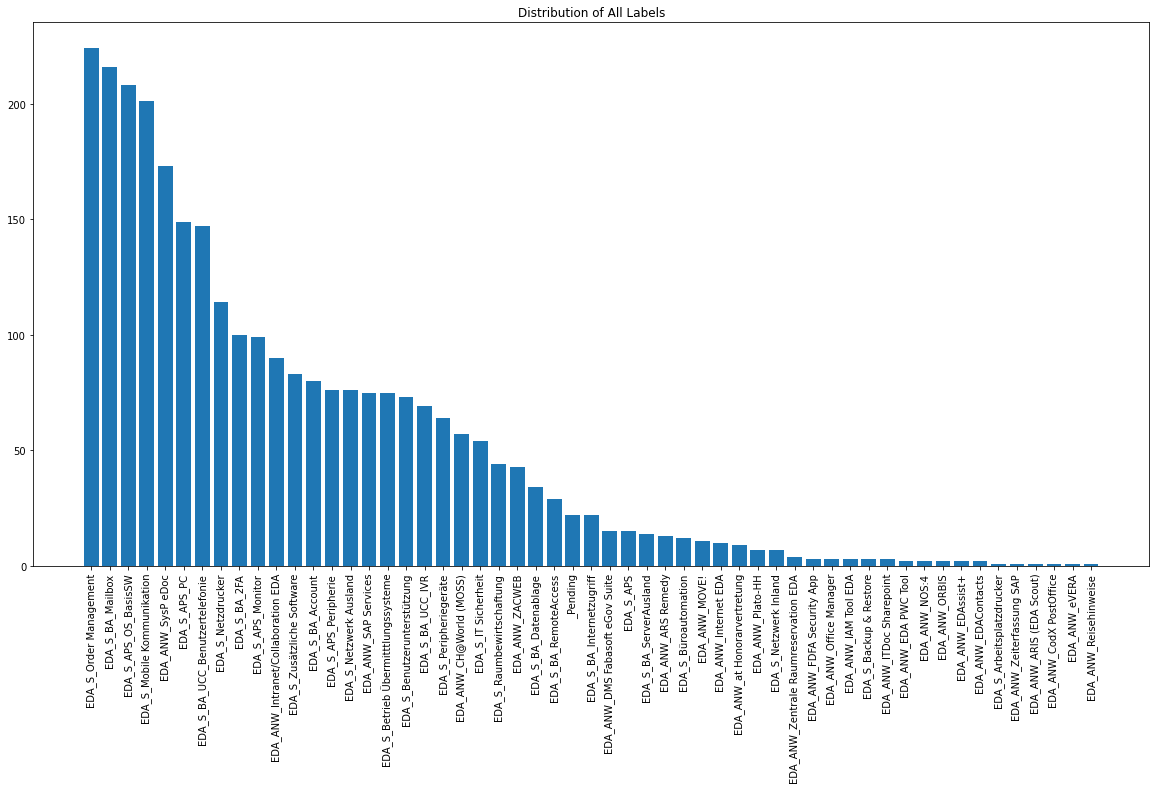

In [39]:
plot_label_distribution(train, "ServiceProcessed", threshold=False)

In [63]:
def identify_language(document):
    return detect(document.lower())

In [64]:
train["WholeMail"] = train["MailSubject"] + " " + train["MailTextBody"]
train.iloc[5]["WholeMail"]

'RichClient Photo mit Partikel MD5:3d5b8242d5f11b10ae9b90f86349b804 einen schönen guten morgen helpdesk-team,  hoffe, ihnen geht es gut und sie sind wohlauf.  heute haben wir passtermine und beim ersten termin haben wir beim aufnehmen des photos einige partikel bemerkt.  das glas haben wir nochmals mit einem screen wipe geputzt aber die partikel sind noch vorhanden.  [cid:image007.jpg@01d6ad17.93a3d8d0]  können sie uns mitteilen, woran das liegen kann oder von wo diese partikel herkommen könnte?  danke für ihre kenntnisnahme und rückmeldung.  mit freundlichen grüsse'

## 

# Data Cleaning

## 

In [65]:
import re

nlp= spacy.blank("de")

pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

new_text ={"texts":[], "services":[]}
s= 0

for index in range(len(train)):

  email = str(train.iloc[index]["WholeMail"])

  phrase = []

  for word in str(email).split():
    if ("MD5" not in word) and ("www" not in word) and ("FW:" not in word) and ("[cid:i" not in word) :
      phrase.append(word.lower())

  email = " ".join(phrase)

  email = re.sub(pattern, "", email)

  tokenized_sentence = " ".join([token.text for token in nlp(email)])


  if len(tokenized_sentence)>10000:
    print(len(tokenized_sentence))

    continue

  if identify_language(tokenized_sentence ) == "de":

    new_text["texts"].append(tokenized_sentence )
  
    new_text["services"].append(str(train.iloc[index]["ServiceProcessed"]))

print(len(new_text["texts"]), len(new_text["services"]))

30950
14837
24081
25681
23993
10485
12908
2662 2662


Install tensorflow if necesary

In [157]:
#!pip install tensorflow==2.1.0
#!pip install tensorflow-text==2.1.0rc0
#!pip install tensorflow_hub==0.8.0


In [67]:
import tensorflow as tf

import tensorflow_hub as hub

import tensorflow_text

Download Multiversal Encoder Large

In [68]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])

multi_use_lg = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

embeddings = multi_use_lg(["The quick brown fox jumps over the lazy dog.", "I am a sentence for which I would like to get its embedding"])


In [69]:
print(embeddings)

tf.Tensor(
[[-0.00258476 -0.00059474  0.07525816 ...  0.0069227  -0.04728683
   0.04143079]
 [ 0.01956906  0.02436489 -0.08010634 ...  0.00997892 -0.05102588
  -0.00850214]], shape=(2, 512), dtype=float32)


Encode al the emails with use

In [70]:

embeddings= []

s = 0

for i in range(len(new_text["texts"])):

    if i % 10 == 0 and i > 0:

        try:

            tmp_embeddings = np.array(multi_use_lg(new_text["texts"][s:i]))

        except:
            print(new_text["texts"][s:i])
 
        for j in range(0, len(tmp_embeddings)):
            embeddings.append(tmp_embeddings[j])

        s = i

    li = i

if s != li:

    tmp_embeddings = np.array(multi_use_lg(new_text["texts"][s:li + 1]))

    for j in range(0, len(tmp_embeddings)):
        embeddings.append(tmp_embeddings[j])

embedded_emails = np.array(embeddings)
print(len(embedded_emails))

2662


Normalize vectors 

In [71]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

embedded_emails_normalized = StandardScaler().fit_transform(embedded_emails)

print(len(embedded_emails_normalized))



2662


Cluster the data in diferent partitions 

In [119]:
partitions = {}

for K in [5,10,15,25]:

    partitions[str(K)] = {}

    clustering =  KMeans(n_clusters=K, n_jobs = 4,  max_iter=300, verbose=1).fit_predict(embedded_emails_normalized)

    print("Proposed cluster for K ==", K)

    clustered_services = {}

    clusters_totals = {}

    clusters_ids = {}

    new_ids = {}

    for i in range(K):

        clustered_services[str(i)] = {}

        clusters_totals[str(i)] = 0

        clusters_ids[str(i)] = []

        new_ids[str(i)] = []



    for i in range(len(clustering)):

        clusters_ids[str(clustering[i])].append(str(i))

        if new_text["services"][i] not in clustered_services[str(clustering[i])]:

            clustered_services[str(clustering[i])][new_text["services"][i]] = 1
        else:
            clustered_services[str(clustering[i])][new_text["services"][i]] +=1

        clusters_totals[str(clustering[i])] +=  1

    amount_labels= {}

    for i in range(len(new_text["services"])):

        if str(new_text["services"][i]) not in amount_labels:

            amount_labels[str(new_text["services"][i])] = 1

        else:
            amount_labels[str(new_text["services"][i])]+= 1


    for elem in clustered_services:

        del_list = []

        for elem1 in clustered_services[elem]:

            clustered_services[elem][elem1] = round((clustered_services[elem][elem1] / amount_labels[elem1]) * 100,2)

            if clustered_services[elem][elem1] < 50:
                clustered_services[elem][elem1] = 0
                del_list.append(elem1)

        for elem1 in del_list:

            del clustered_services[elem][elem1]


        for elem1 in clusters_ids[elem]:

            if new_text["services"][int(elem1)] in clustered_services[elem]:

                new_ids[elem].append(elem1)


    print()
    print()
    labels_to_clusters = []

    s = 0

    for elem in clustered_services:

        if len(clustered_services[elem]) < 2:
            continue

        
        tmp_dict = clustered_services[elem]


        for elem1 in tmp_dict:
            tmp_dict[elem1] = str(tmp_dict[elem1])+"%"

        print()

        print("Merge:", s)
        
        partitions [ str(K)][str(s)] = {}

        partitions[str(K)] [str(s)] ["composition"] = [elem1 for elem1 in clustered_services[elem]]

        partitions[str(K)][str(s)]["total element"] = clusters_totals[str(elem)]

        partitions[str(K)][str(s)]["indices"] = new_ids[elem]

        print()

        print([elem1 for elem1 in clustered_services[elem]])
        print()

        print("total elements:", clusters_totals[str(elem)])

        print()
        print("Composition:")
        print(tmp_dict)
        s+=1

        print()
        print()
        print()
        

        #for elem1 in clustered_services[elem]:
            #if elem1 not in labels_to_clusters:
                #labels_to_clusters.append(elem1)



        
print()

Proposed cluster for K == 5



Merge: 0

['EDA_S_Netzdrucker', 'EDA_ANW_CodX PostOffice', 'EDA_S_Arbeitsplatzdrucker', 'EDA_ANW_ARIS (EDA Scout)']

total elements: 182

Composition:
{'EDA_S_Netzdrucker': '88.99%', 'EDA_ANW_CodX PostOffice': '100.0%', 'EDA_S_Arbeitsplatzdrucker': '100.0%', 'EDA_ANW_ARIS (EDA Scout)': '100.0%'}




Merge: 1

['EDA_S_BA_2FA', 'EDA_ANW_Zeiterfassung SAP']

total elements: 161

Composition:
{'EDA_S_BA_2FA': '81.05%', 'EDA_ANW_Zeiterfassung SAP': '100.0%'}




Merge: 2

['EDA_S_IT Sicherheit', 'EDA_ANW_Intranet/Collaboration EDA', 'EDA_S_BA_Account', 'EDA_S_APS_OS_BasisSW', 'EDA_ANW_DMS Fabasoft eGov Suite', 'EDA_S_BA_Mailbox', 'EDA_S_Mobile Kommunikation', 'EDA_ANW_Office Manager', 'EDA_S_Zusätzliche Software', 'EDA_ANW_Zentrale Raumreservation EDA', 'EDA_ANW_SAP Services', 'EDA_ANW_ARS Remedy', '_Pending', 'EDA_S_BA_RemoteAccess', 'EDA_S_BA_Datenablage', 'EDA_ANW_IAM Tool EDA', 'EDA_ANW_Internet EDA', 'EDA_ANW_at Honorarvertretung', 'EDA_ANW_ZACWEB', 'EDA_

Explore different possible merges

In [158]:
K = 15

for elem in partitions[str(K)]:
    print("Merge:",int(elem)+1)
    print()
    print(partitions[str(K)][elem]["composition"])
    print()

    print("Examples of these email classes:")
    print()

    already_showed=[]

    for elem1 in partitions[str(K)][elem]["indices"]:
        if new_text["services"][int(elem1)] not in already_showed:
            print("[",new_text["services"][int(elem1)],"]", new_text["texts"][int(elem1)])
            print()
            already_showed.append(new_text["services"][int(elem1)])
            if len(already_showed)==len(partitions[str(K)][elem]["composition"]):
                break 

    print()




Merge: 1

['EDA_S_APS_OS_BasisSW', 'EDA_ANW_Office Manager']

Examples of these email classes:

[ EDA_S_APS_OS_BasisSW ] acrobat reader liebes helpdesk in der vorbereitung für die actenova migration finde ich im k : die belege früherer wochen zwar abgespeichert , aber beim öffnen erscheint die fehlermeldung unten und kein inhalt . gibt es eine möglichkeit , den inhalt mit einem « trick » zu rekonstruieren ? wir haben seit langem probleme beim pd24 programm . teilweise speichern sich die unterlagen ohne hürden , zeitweise aber mit offensichtlich nachträglichen überraschungen beim wiederöffnen . ich habe einzelne stichproben im laufwerk gemacht , aber es wird mir unmöglich sein , jeden beleg vor der migration noch einzeln zu testen . danke für ihre hilfe , da ich es sich um geschäftsrelevante archiv-belege handelt . freundliche grüsse k:/ vision / bratislava/woche 28 wilma unfer fachspezialistin eidgenössisches departement für auswärtige angelegenheiten eda direktion für ressourcen dr fi